In [ ]:
# Include Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate

In [ ]:
#Loading the dataset
df_UrbanData = pd.read_csv('/content/Urban_data.csv')

In [ ]:
df_UrbanData

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


In [ ]:
#to retrieve the initial 10 rows
df_UrbanData.head(10)

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
5,Asia/Oceania,Kabul,0.076,3.499,3.510,79.3,1.062,2.673,0.226,0.130
6,Asia/Oceania,Karachi,0.088,3.485,3.493,71.3,1.032,3.027,0.095,0.216
7,Asia/Oceania,Kathmandu,0.054,3.523,3.500,63.3,1.071,2.595,0.234,0.089
8,Asia/Oceania,Kyoto,0.357,3.148,3.229,49.6,1.090,2.887,0.134,0.157
9,Asia/Oceania,Manila,0.062,3.514,3.484,63.5,1.023,3.141,0.095,0.347


In [ ]:
df_UrbanData.shape

(100, 10)

In [ ]:
#column names are retrieved
df_UrbanData.columns

Index(['Region', 'City', 'orientation_order', 'street_orientation_entropy',
       'weighted_street_orientation_entropy', 'median_street_segmant',
       'average_circuity', 'average_node_degree', 'proportion_of_dead-ends',
       'proportion_of_four_way_intersection'],
      dtype='object')

In [ ]:
df_UrbanData.dtypes

Region                                  object
City                                    object
orientation_order                      float64
street_orientation_entropy             float64
weighted_street_orientation_entropy    float64
median_street_segmant                  float64
average_circuity                       float64
average_node_degree                    float64
proportion_of_dead-ends                float64
proportion_of_four_way_intersection    float64
dtype: object

In [ ]:
#Number of NULL values are counted
df_UrbanData.isnull().sum()

Region                                 0
City                                   0
orientation_order                      0
street_orientation_entropy             0
weighted_street_orientation_entropy    0
median_street_segmant                  0
average_circuity                       0
average_node_degree                    0
proportion_of_dead-ends                0
proportion_of_four_way_intersection    0
dtype: int64

Preprocessing the original data so that the NULL values can be reduced to zero.

In [ ]:
# to locate the row where the Region column is Europe
df_UrbanData[df_UrbanData['Region']=='Europe']

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
23,Europe,Amsterdam,0.071,3.504,3.488,65.8,1.080,2.897,0.146,0.205
24,Europe,Athens,0.041,3.538,3.532,55.5,1.019,3.245,0.056,0.363
25,Europe,Barcelona,0.108,3.462,3.460,78.1,1.052,3.135,0.078,0.303
26,Europe,Berlin,0.011,3.572,3.570,113.1,1.040,3.002,0.118,0.259
27,Europe,Budapest,0.050,3.528,3.516,93.0,1.032,3.037,0.096,0.231
28,Europe,Copenhagen,0.029,3.552,3.551,78.0,1.048,2.881,0.146,0.194
29,Europe,Dublin,0.024,3.557,3.541,71.5,1.061,2.492,0.279,0.068
30,Europe,Glasgow,0.047,3.531,3.513,72.3,1.079,2.620,0.238,0.109
31,Europe,Helsinki,0.006,3.577,3.571,42.0,1.063,2.348,0.395,0.134
32,Europe,Kiev,0.014,3.568,3.554,125.1,1.053,2.813,0.164,0.160


In [ ]:
df_UrbanData[df_UrbanData['Region']=='Latin America']

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
48,Latin America,Bogota,0.040,3.539,3.529,58.4,1.044,2.977,0.122,0.234
49,Latin America,Buenos Aires,0.151,3.411,3.423,104.8,1.011,3.548,0.027,0.576
50,Latin America,Caracas,0.029,3.551,3.564,95.3,1.148,2.710,0.217,0.145
51,Latin America,Havana,0.029,3.551,3.552,86.9,1.040,3.130,0.118,0.357
52,Latin America,Lima,0.278,3.254,3.228,76.7,1.017,3.161,0.040,0.331
53,Latin America,Mexico City,0.154,3.408,3.406,69.9,1.043,2.977,0.146,0.264
54,Latin America,Port au Prince,0.028,3.552,3.554,55.0,1.088,2.495,0.295,0.087
55,Latin America,Rio de Janeiro,0.014,3.568,3.566,74.0,1.055,2.804,0.172,0.147
56,Latin America,Sao Paulo,0.002,3.581,3.580,76.0,1.050,2.936,0.120,0.176


In [ ]:
df_UrbanData[df_UrbanData['Region']=='Middle East/Africa']

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
57,Middle East/Africa,Baghdad,0.083,3.490,3.498,68.3,1.033,3.043,0.050,0.144
58,Middle East/Africa,Beirut,0.206,3.344,3.308,63.9,1.026,3.061,0.072,0.218
59,Middle East/Africa,Cairo,0.041,3.538,3.526,66.6,1.067,2.996,0.085,0.171
60,Middle East/Africa,Cape Town,0.025,3.556,3.553,75.2,1.102,2.793,0.183,0.162
61,Middle East/Africa,Casablanca,0.094,3.477,3.461,48.0,1.048,3.026,0.080,0.178
62,Middle East/Africa,Damascus,0.043,3.536,3.525,65.8,1.085,2.801,0.146,0.107
63,Middle East/Africa,Dubai,0.031,3.550,3.529,79.7,1.087,2.925,0.074,0.073
64,Middle East/Africa,Istanbul,0.007,3.576,3.574,50.1,1.059,2.998,0.093,0.174
65,Middle East/Africa,Jerusalem,0.014,3.568,3.562,44.0,1.092,2.735,0.180,0.109
66,Middle East/Africa,Johannesburg,0.019,3.562,3.556,88.6,1.098,2.865,0.158,0.182


In [ ]:
df_UrbanData[df_UrbanData['Region']=='US/Canada']

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
71,US/Canada,Atlanta,0.315,3.204,3.197,112.5,1.074,2.806,0.164,0.153
72,US/Canada,Baltimore,0.223,3.324,3.367,100.0,1.036,3.182,0.085,0.360
73,US/Canada,Boston,0.026,3.554,3.552,77.0,1.039,2.945,0.135,0.211
74,US/Canada,Charlotte,0.002,3.582,3.581,117.2,1.067,2.546,0.288,0.139
75,US/Canada,Chicago,0.899,2.083,2.103,105.3,1.016,3.343,0.074,0.507
76,US/Canada,Cleveland,0.486,2.961,2.899,103.7,1.029,2.979,0.091,0.198
77,US/Canada,Dallas,0.305,3.218,3.182,106.1,1.042,3.120,0.091,0.317
78,US/Canada,Denver,0.678,2.634,2.571,102.7,1.031,3.249,0.071,0.416
79,US/Canada,Detroit,0.582,2.807,2.718,101.2,1.012,3.352,0.053,0.482
80,US/Canada,Honolulu,0.034,3.545,3.550,101.8,1.073,2.681,0.252,0.185


In [ ]:
#Filling the missing values in the data
condition = df_UrbanData.index < 23
df_UrbanData.loc[condition,['Region']] = 'Asia/Oceania'

In [ ]:
condition1 = (df_UrbanData.index > 23) & (df_UrbanData.index < 48)
df_UrbanData.loc[condition1,['Region']] = 'Europe'

In [ ]:
condition1 = (df_UrbanData.index > 48) & (df_UrbanData.index < 57)
df_UrbanData.loc[condition1,['Region']] = 'Latin America'

In [ ]:
condition1 = (df_UrbanData.index > 57) & (df_UrbanData.index < 71)
df_UrbanData.loc[condition1,['Region']] = 'Middle East/Africa'

In [ ]:
condition1 = (df_UrbanData.index > 71) & (df_UrbanData.index < 101)
df_UrbanData.loc[condition1,['Region']] = 'US/Canada'

In [ ]:
df_UrbanData.isnull().sum()

Region                                 0
City                                   0
orientation_order                      0
street_orientation_entropy             0
weighted_street_orientation_entropy    0
median_street_segmant                  0
average_circuity                       0
average_node_degree                    0
proportion_of_dead-ends                0
proportion_of_four_way_intersection    0
dtype: int64

In [ ]:
df_UrbanData

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


After the initial preprocessing of the data the NULL values have been eliminated from the dataframe.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_urban=df_UrbanData
df_num = df_urban.iloc[:, 2:10]
scaleMinMax = MinMaxScaler(feature_range=(0,1))
df_norm = scaleMinMax.fit_transform(df_num)
df_norm = pd.DataFrame(df_norm, columns = ['orientation-order indicator','street orientation entropy','weighted street orientation entropy','median street segment length','average circuity','average node degree','dead-ends','four-way intersections'])
df_norm

,orientation-order indicator,street orientation entropy,weighted street orientation entropy,median street segment length,average circuity,average node degree,dead-ends,four-way intersections
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961
...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049


We can see that the values of the median_street_segment are extremely high when compared to the values of the other features therefore the data need to be normalized before undergoing the clustering methods.

Kmeans and Hierarchial are distance based algorithms, therefore features with larger scales may have a disproportionate impact on the distance values calculated. So, the data needs to be normalized before it is used for clustering.

In [ ]:
df_norm

,orientation-order indicator,street orientation entropy,weighted street orientation entropy,median street segment length,average circuity,average node degree,dead-ends,four-way intersections
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961
...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049


As there are a total of 8 features that need to be considered for clustering process, pairplots are drawn to indicate their relations.

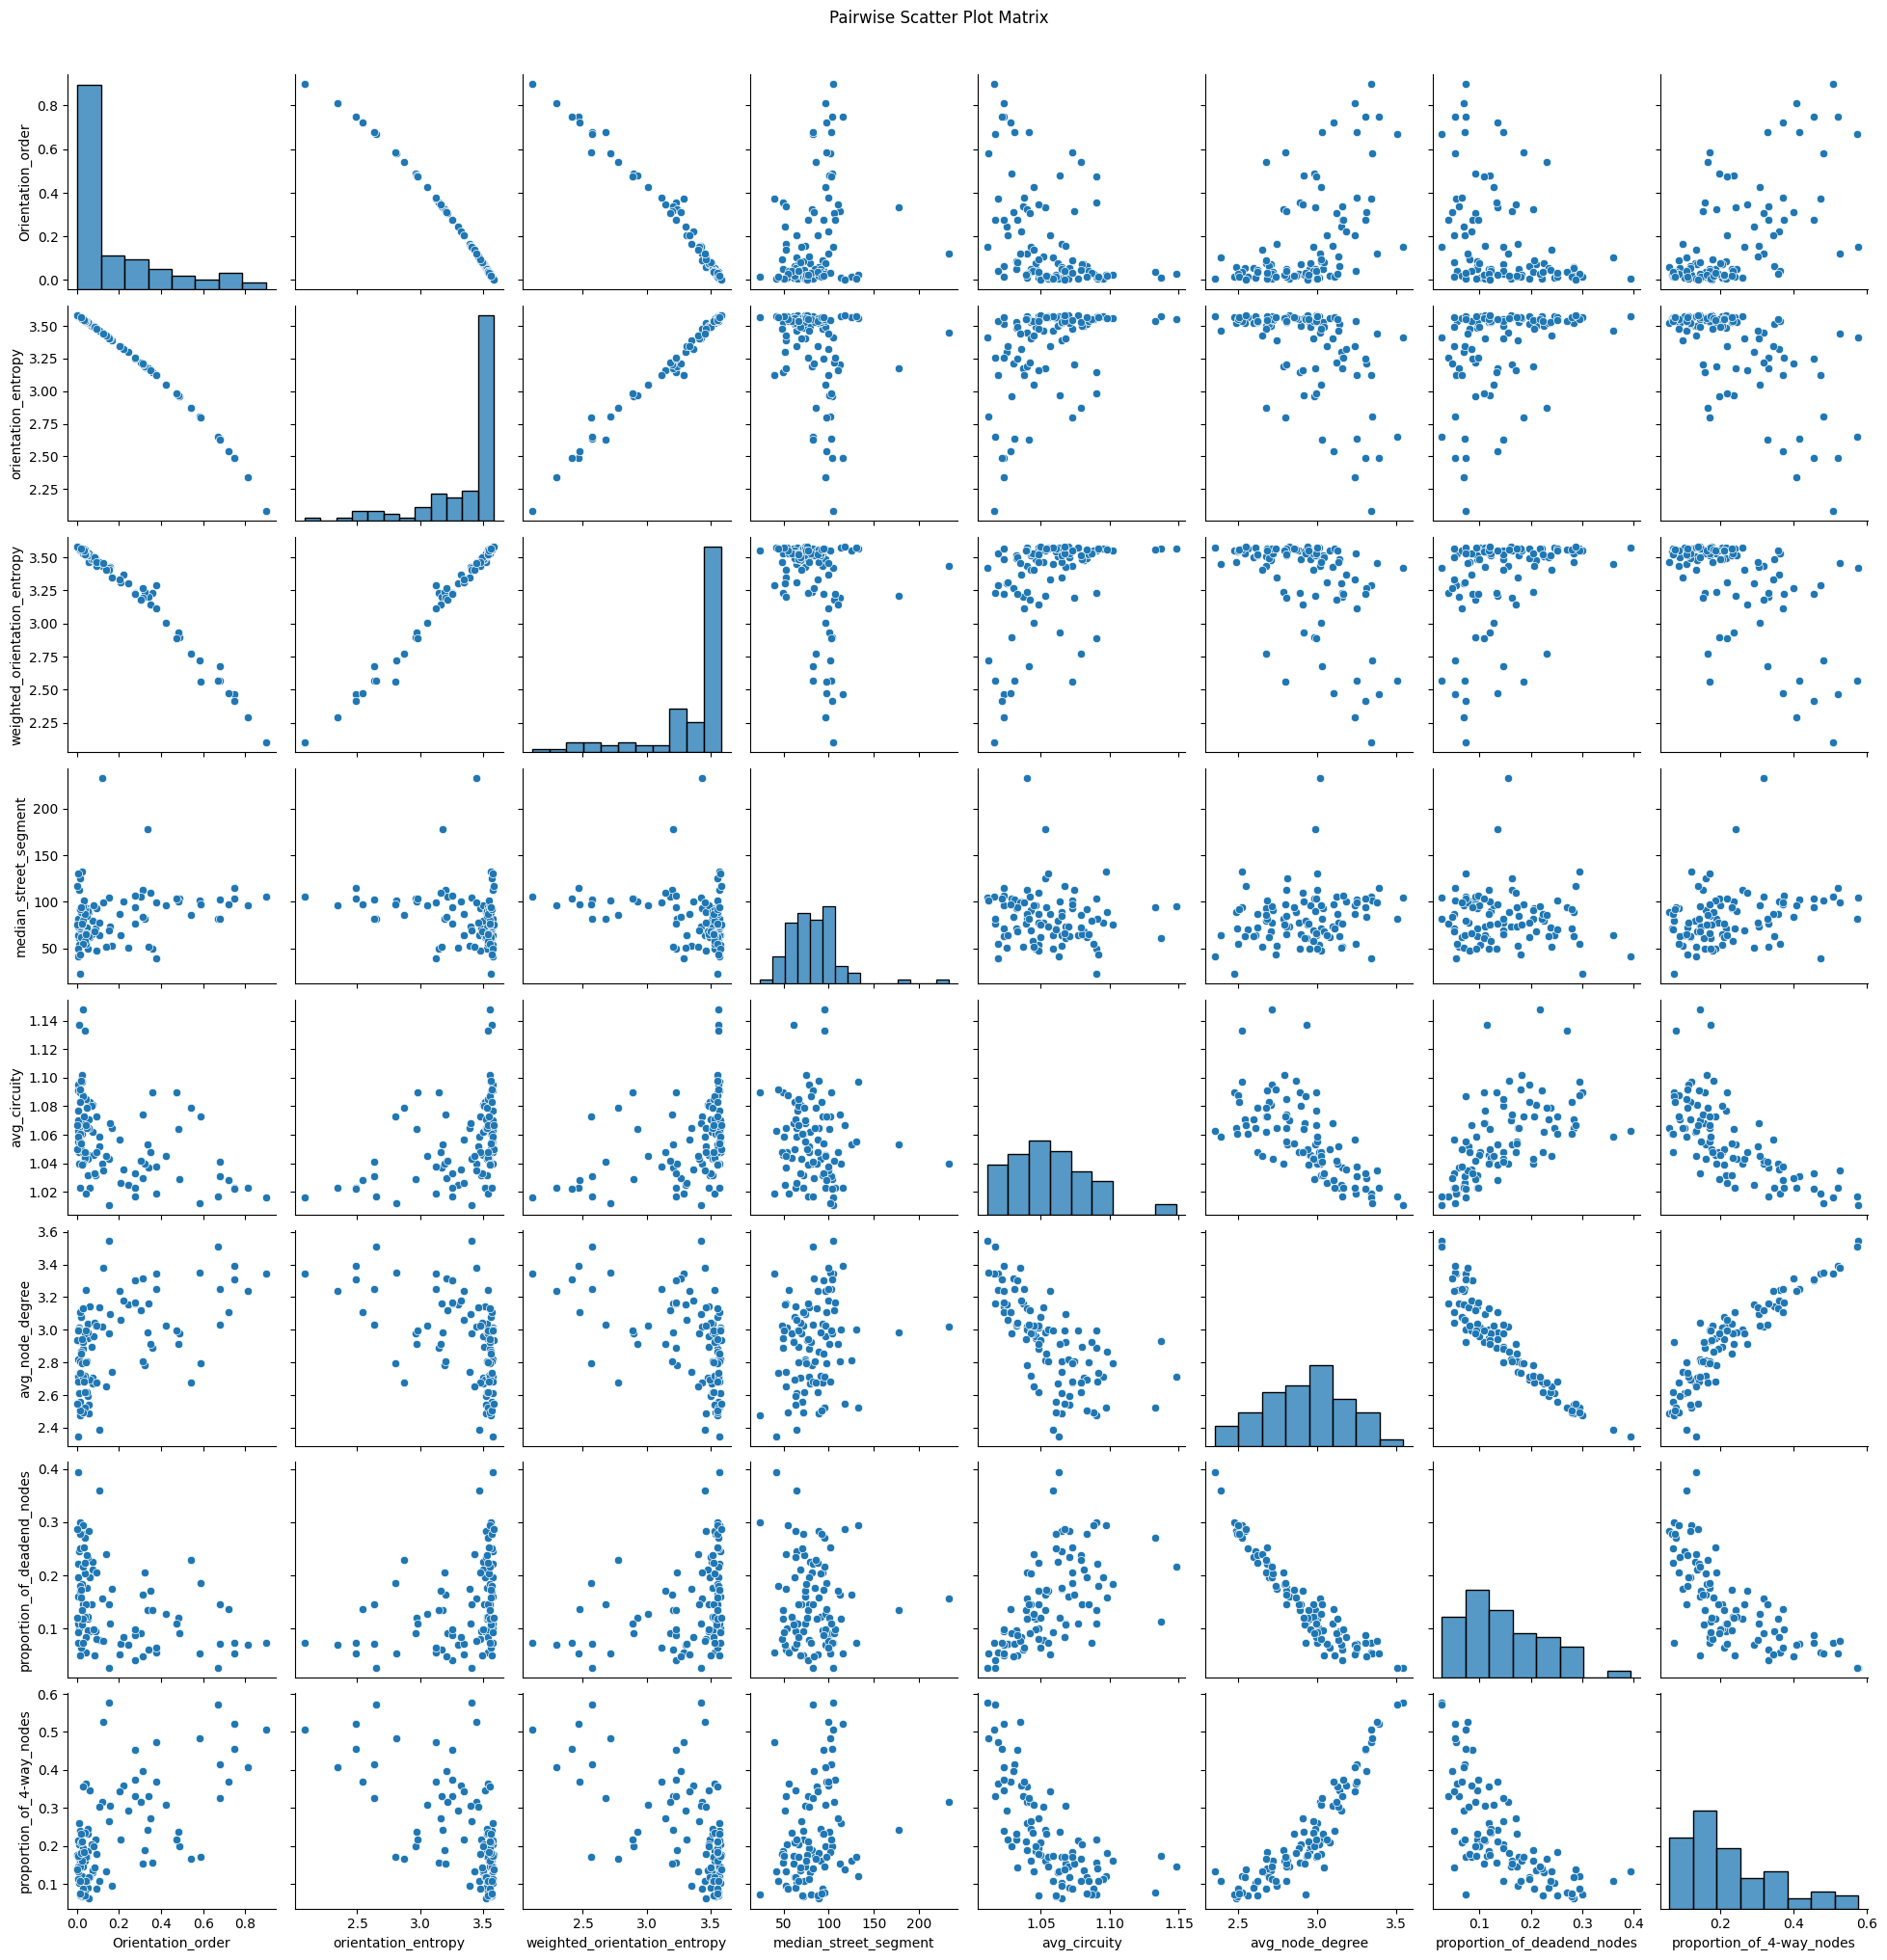

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Select a subset of features for illustration
selected_features = df_UrbanData.columns

# Create a scatter plot matrix
sns.pairplot(df_UrbanData[selected_features])
plt.suptitle('Pairwise Scatter Plot Matrix', y=1.02)
plt.show()


Elbow method is implemented to determine the K value for the Kmeans Algorithm. The value in the graph where there appears a clear elbow bend from where there is a continous decrease in SSE is chosen as the K value.

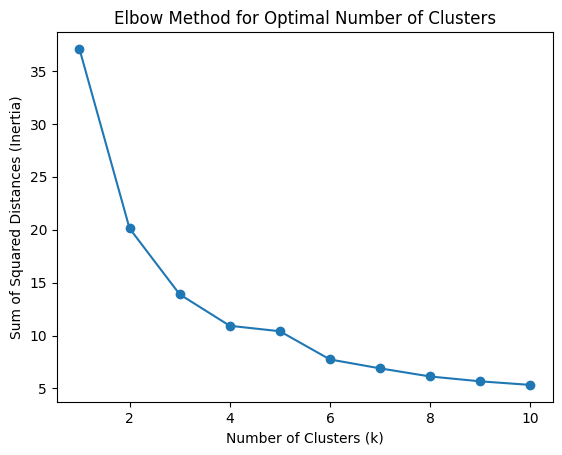

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
    kmeans.fit(df_norm)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


After determining the K value the Kmeans algorithm is applied and the scatter plot for two features is selected to show the clustering process in an effective way.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


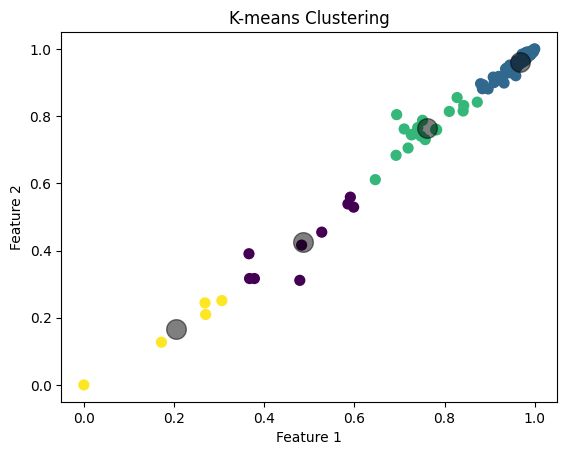

In [ ]:
X = np.array(df_norm[['street orientation entropy','weighted street orientation entropy']])

# Specify the number of clusters
num_clusters = 4

# Create and fit the model
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
labels = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The scatter plot below shows the points according to the Regions in which the cities are located. Many insights such as that the cities in US/canada are closely clustered together whereas the cities in Middle East/Africa and Europe are distributed over the whole space.

<Axes: xlabel='avg_circuity', ylabel='proportion_of_deadend_nodes'>

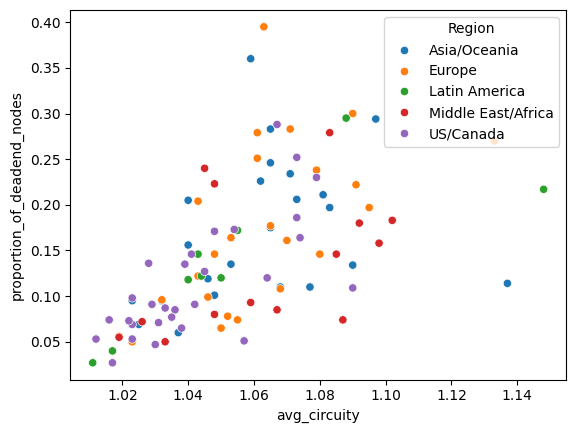

In [ ]:
sns.scatterplot (x= 'avg_circuity', y='proportion_of_deadend_nodes', hue='Region', data=df_UrbanData)

Hierarchial clustering with different linkages and their specific dendograms are depicted below.

In [ ]:
# hierarchial clustering for single linkage
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_normalized, method = 'single')

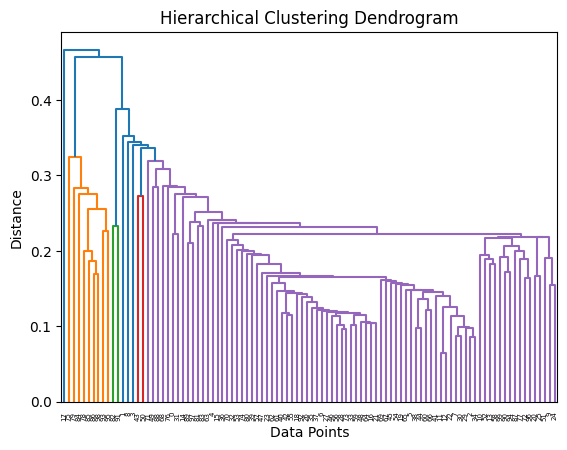

In [ ]:
# displaying the dendogram
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

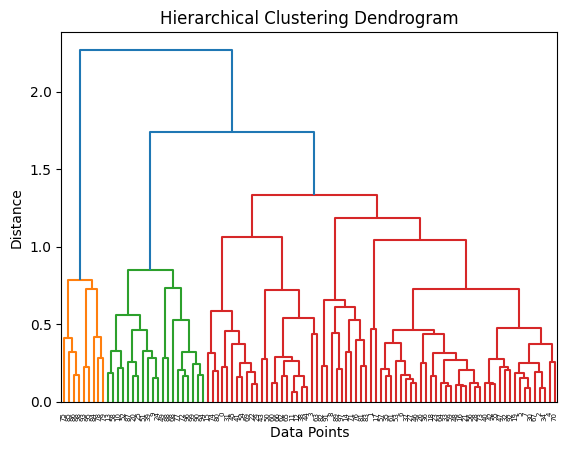

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_normalized, method = 'complete')
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

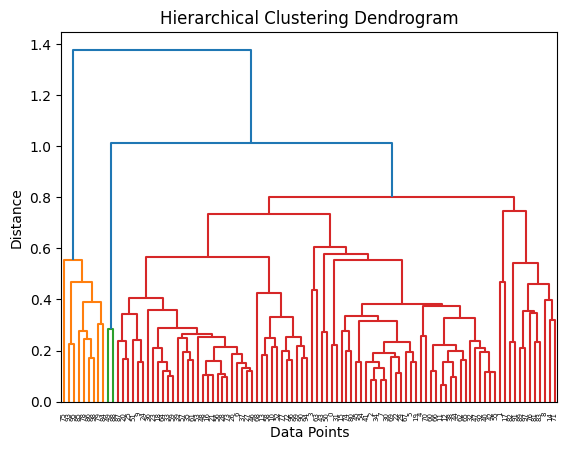

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_normalized, method = 'average')
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

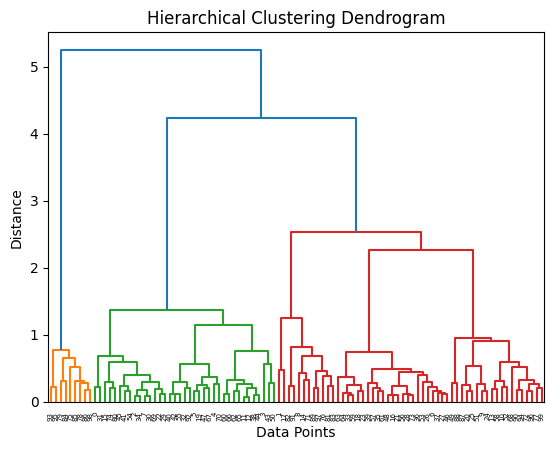

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_normalized, method = 'ward')
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# showing the labels for each datapoint in the clustering
from sklearn.cluster import AgglomerativeClustering
mdl = AgglomerativeClustering(n_clusters=3)
mdl.fit(df_normalized)
mdl.labels_

array([2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0])

To visualize the data in a more insightful way and to gain better perspective I have decided to add the population of the cities to the original dataframe in order to analyze the clusters.

In [ ]:
df_population = pd.read_csv('WorldCities.csv')
df_population

,City,Population
0,Bangkok,37732000
1,Beijing,33756000
2,Hanoi,32226000
3,Hong Kong,26940000
4,Jakarta,24973000
...,...,...
95,Seattle,5871474
96,St Louis,5849700
97,Toronto,5827200
98,Vancouver,5818255


The population of the cities are added by using the join concept.

In [ ]:
df_population.columns

Index(['City', 'Population'], dtype='object')

In [ ]:
# merging the dataframes together
result = pd.merge(df_UrbanData,df_population,how = 'inner',on="City")

A final result dataframe is obtained which has an additional column for the population values of the cities.

In [ ]:
result

,Region,City,Orientation_order,orientation_entropy,weighted_orientation_entropy,median_street_segment,avg_circuity,avg_node_degree,proportion_of_deadend_nodes,proportion_of_4-way_nodes,Population
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108,37732000
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241,33756000
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102,32226000
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174,26940000
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096,24973000
...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369,5871474
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374,5849700
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217,5827200
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455,5818255


In [ ]:
result.isnull().sum()

Region                          0
City                            0
Orientation_order               0
orientation_entropy             0
weighted_orientation_entropy    0
median_street_segment           0
avg_circuity                    0
avg_node_degree                 0
proportion_of_deadend_nodes     0
proportion_of_4-way_nodes       0
Population                      0
dtype: int64

In [ ]:
df_UrbanData[df_UrbanData['Region']=='Europe']

,Region,City,Orientation_order,orientation_entropy,weighted_orientation_entropy,median_street_segment,avg_circuity,avg_node_degree,proportion_of_deadend_nodes,proportion_of_4-way_nodes
23,Europe,Amsterdam,0.071,3.504,3.488,65.8,1.080,2.897,0.146,0.205
24,Europe,Athens,0.041,3.538,3.532,55.5,1.019,3.245,0.056,0.363
25,Europe,Barcelona,0.108,3.462,3.460,78.1,1.052,3.135,0.078,0.303
26,Europe,Berlin,0.011,3.572,3.570,113.1,1.040,3.002,0.118,0.259
27,Europe,Budapest,0.050,3.528,3.516,93.0,1.032,3.037,0.096,0.231
28,Europe,Copenhagen,0.029,3.552,3.551,78.0,1.048,2.881,0.146,0.194
29,Europe,Dublin,0.024,3.557,3.541,71.5,1.061,2.492,0.279,0.068
30,Europe,Glasgow,0.047,3.531,3.513,72.3,1.079,2.620,0.238,0.109
31,Europe,Helsinki,0.006,3.577,3.571,42.0,1.063,2.348,0.395,0.134
32,Europe,Kiev,0.014,3.568,3.554,125.1,1.053,2.813,0.164,0.160
